# project_1_eda

Main purpose of this notebook is to glimpse through input dataframes in search for features correlations using automatic EDA frameworks such as [pandas-profiling (now ydata-profiling)](https://github.com/ydataai/ydata-profiling) or [dython](http://shakedzy.xyz/dython/).

In [2]:
# !pip install dython

In [4]:
# !pip install -U ydata-profiling

In [3]:
import os
import pandas as pd

## dython

In [48]:
interactions_df = pd.read_csv(os.path.join("../data", "hotel_data", "model_interactions_df.csv")).iloc[:, 2:]
interactions_df

,interacted,user_term_WinterVacation,user_term_Easter,user_term_OffSeason,user_term_HighSeason,user_term_LowSeason,user_term_MayLongWeekend,user_term_NewYear,user_term_Christmas,user_length_of_stay_bucket_[0-1],...,room_segment_[160-260],room_segment_[260-360],room_segment_[360-500],room_segment_[500-900],n_people_bucket_[1-1],n_people_bucket_[2-2],n_people_bucket_[3-4],n_people_bucket_[5-inf],weekend_stay_True,weekend_stay_False
0,1,0.090909,0.0,0.681818,0.090909,0.136364,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,1
1,0,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,1
2,0,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,1
3,0,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,1
4,0,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87963,0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,1
87964,0,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,1
87965,0,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,1
87966,0,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,1


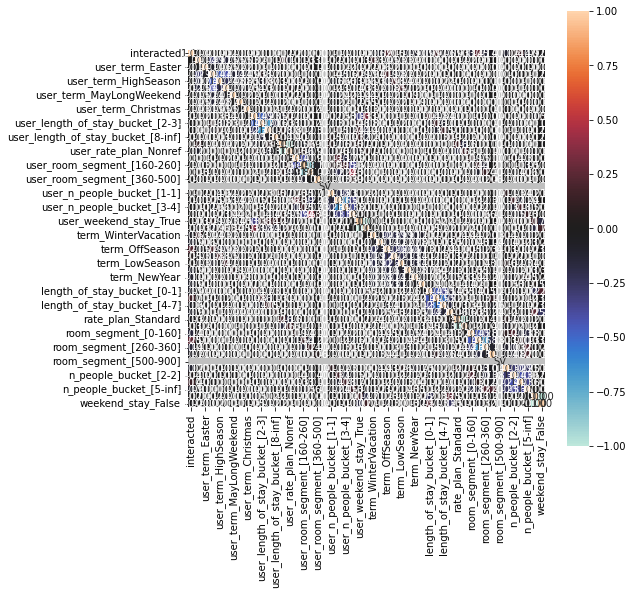

In [38]:
from dython.nominal import associations

correlations = associations(interactions_df, figsize=(8, 8))

In [44]:
correlations['corr']['interacted'].sort_values()

room_segment_[0-160]                 -0.141782
room_segment_[260-360]               -0.136396
n_people_bucket_[1-1]                -0.122196
term_NewYear                         -0.098738
term_Easter                          -0.094546
n_people_bucket_[5-inf]              -0.091055
term_Christmas                       -0.088814
term_MayLongWeekend                  -0.088740
length_of_stay_bucket_[8-inf]        -0.087155
length_of_stay_bucket_[0-1]          -0.085339
room_segment_[360-500]               -0.069786
term_WinterVacation                  -0.062583
length_of_stay_bucket_[4-7]          -0.055642
rate_plan_Standard                   -0.030847
user_rate_plan_Nonref                -0.022031
weekend_stay_False                   -0.018943
user_term_Easter                     -0.006319
user_length_of_stay_bucket_[2-3]     -0.006269
user_n_people_bucket_[3-4]           -0.005363
user_term_MayLongWeekend             -0.005030
user_n_people_bucket_[5-inf]         -0.004937
user_term_New

## pandas-profiling

In [45]:
from ydata_profiling import ProfileReport

profile = ProfileReport(interactions_df, title="pandas profiling report")

In [47]:
# profile 
# commented for saving notebook, since too large size